In [2]:
basic_statistics = data.describe()
basic_statistics

NameError: name 'data' is not defined

In [3]:
import pandas as pd

data = pd.read_csv("Hotel_reservations.csv")
data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

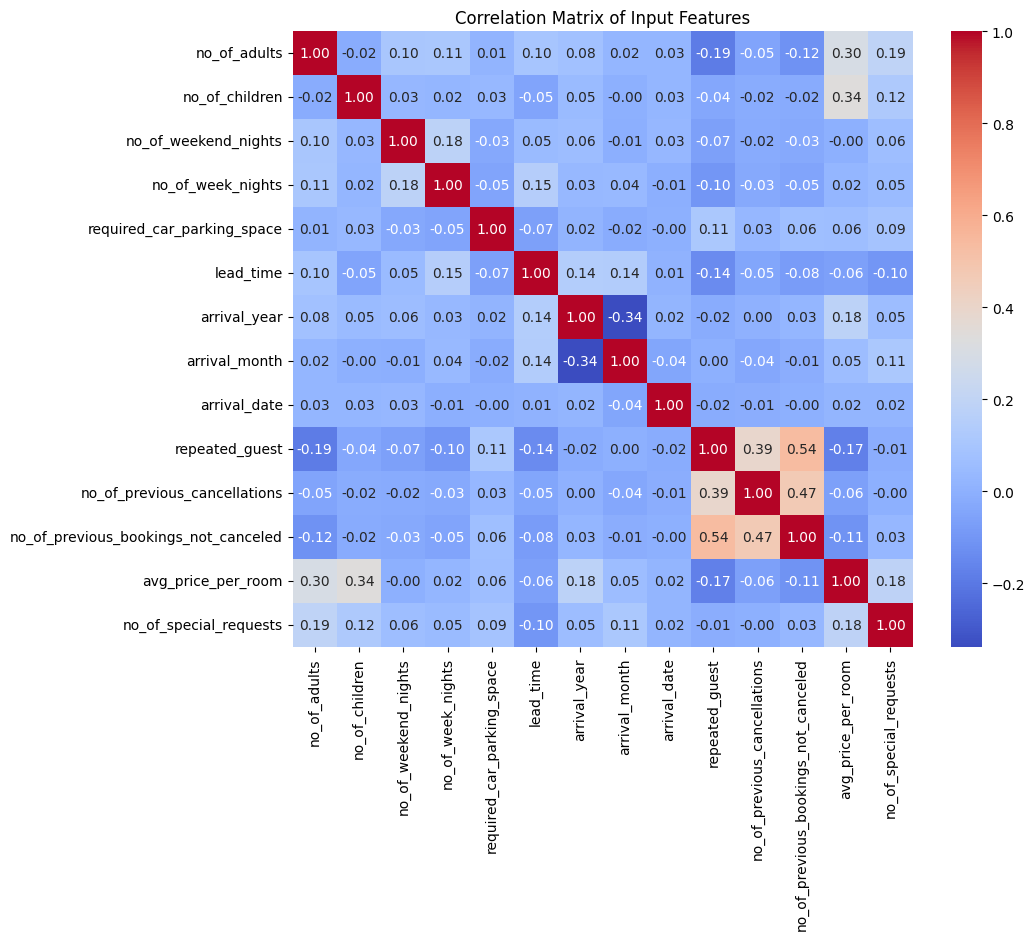

In [5]:
numeric_data = data.select_dtypes(include=["number"]) 
correlation_matrix = numeric_data.corr()
correlation_matrix


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Input Features")
plt.show()


In [6]:
numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'required_car_parking_space',          
                     'no_of_week_nights', 'lead_time', 'arrival_year', 
                     'arrival_month', 'arrival_date', 'repeated_guest','no_of_previous_cancellations', 
                     'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
                     'no_of_special_requests']



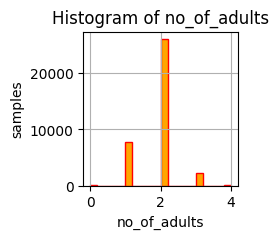

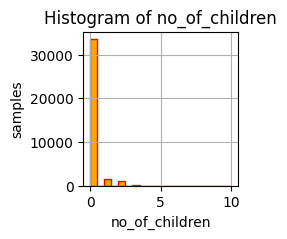

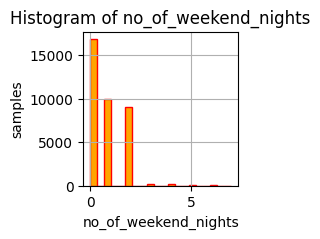

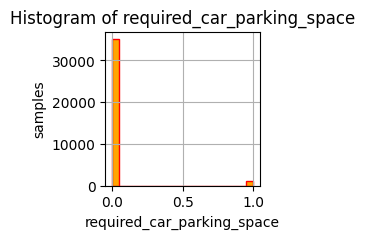

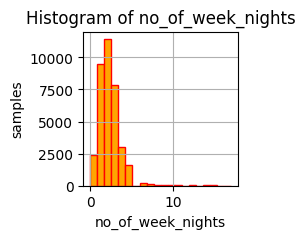

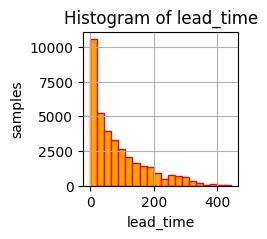

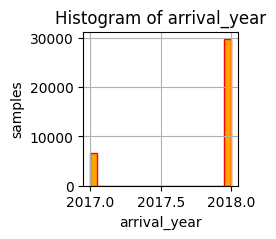

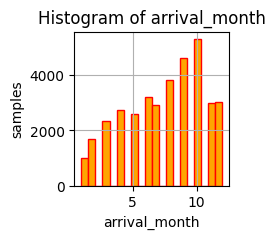

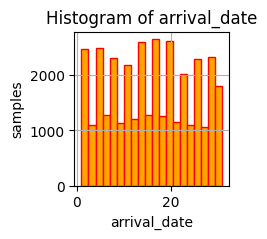

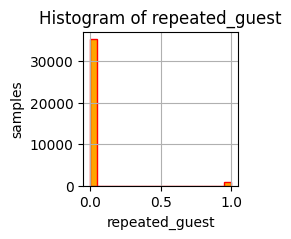

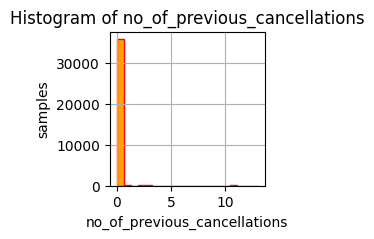

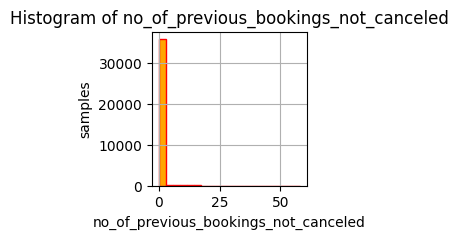

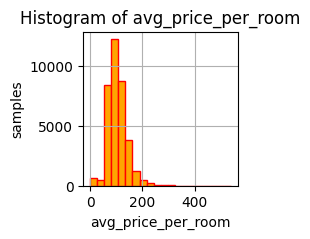

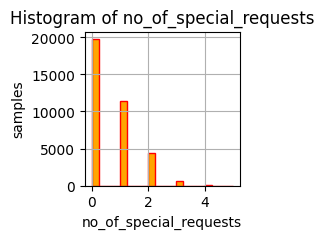

In [7]:
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.figure(figsize=(2, 2))
    plt.hist(data[column], bins=20, color='orange', edgecolor='red')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('samples')
    plt.grid(True)
    plt.show()

In [8]:
data["booking_status"] = data["booking_status"].apply(lambda x: 0 if x == "Canceled" else 1)

In [9]:
categorical_columns = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(drop="first"), categorical_columns),
    ]
)

In [12]:
X = preprocessor.fit_transform(data.drop(columns=["booking_status"]))
y = data["booking_status"]

In [13]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [14]:
X

array([[ 0.29889263, -0.26147045,  0.2174012 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.29889263, -0.26147045,  1.36599262, ...,  0.        ,
         0.        ,  1.        ],
       [-1.62897546, -0.26147045,  1.36599262, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.29889263, -0.26147045,  1.36599262, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29889263, -0.26147045, -0.93119021, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29889263, -0.26147045,  0.2174012 , ...,  0.        ,
         1.        ,  0.        ]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="silu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation="silu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation="silu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

C:\Users\ashwi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32)

Epoch 1/500
726/726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7579 - loss: 0.5021 - val_accuracy: 0.8082 - val_loss: 0.4102
Epoch 2/500
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8016 - loss: 0.4282 - val_accuracy: 0.8136 - val_loss: 0.3975
Epoch 3/500
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8134 - loss: 0.4114 - val_accuracy: 0.8151 - val_loss: 0.3938
Epoch 4/500
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8101 - loss: 0.4172 - val_accuracy: 0.8246 - val_loss: 0.3848
Epoch 5/500
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8101 - loss: 0.4137 - val_accuracy: 0.8260 - val_loss: 0.3820
Epoch 6/500
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8166 - loss: 0.4066 - val_accuracy: 0.8284 - val_loss: 0.3801
Epoch 7/500
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8208 - loss: 0.3975 - val_accuracy: 0.8298 - val_loss: 0.3793
Epoch 8/500
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8178 - loss: 0.3997 - val_accu

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8708 - loss: 0.2870
Test Accuracy: 87.73%


In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
def plot_loss(history):
    plt.figure(figsize=(10, 7))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

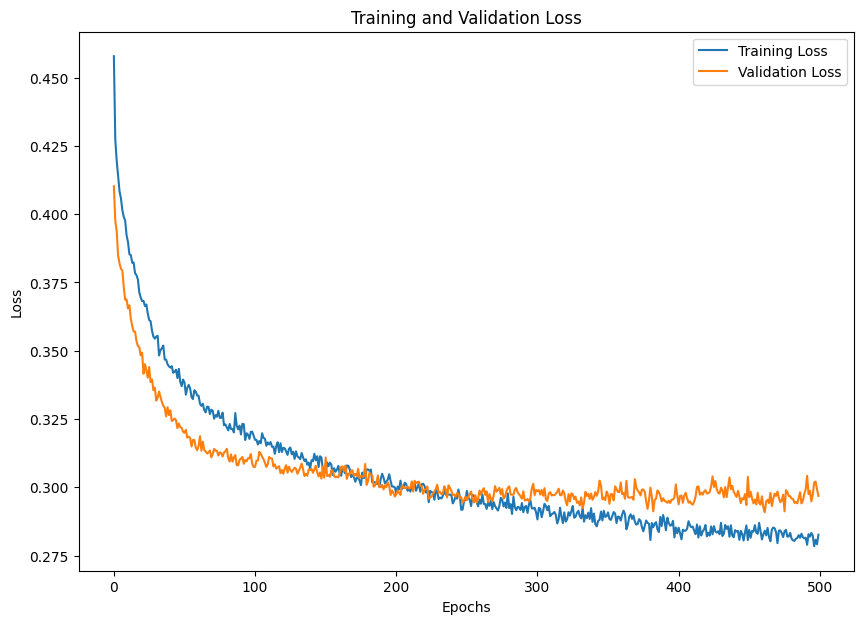

In [34]:
plot_loss(history)

In [35]:
# Display a sample of actual and predicted values for comparison
import numpy as np

# Predicted probabilities and converting to binary
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Sample comparison
comparison_df = pd.DataFrame({
    "Actual (y_test)": np.array(y_test),
    "Predicted (y_pred)": y_pred.flatten(),
    "Predicted Probability": y_pred_prob.flatten()
})

comparison_df


227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


Actual (y_test)  Predicted (y_pred)  Predicted Probability
0                   1                   1               1.000000
1                   1                   1               0.988729
2                   1                   1               0.974735
3                   0                   0               0.234567
4                   1                   1               0.999937
...               ...                 ...                    ...
7250                0                   0               0.008681
7251                1                   1               1.000000
7252                1                   1               1.000000
7253                1                   1               0.752316
7254                1                   1               0.903971

[7255 rows x 3 columns]

In [36]:
# Calculate the distribution of canceled and not canceled in the test data
test_distribution = y_test.value_counts()

# Display the results
test_distribution

booking_status
1    4839
0    2416
Name: count, dtype: int64

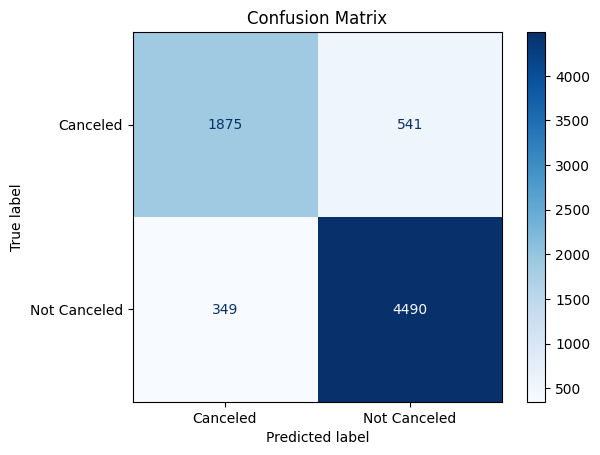

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Canceled", "Not Canceled"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [38]:
model.save('fds_model_1.keras')

In [39]:
from tensorflow.keras.models import load_model
model= load_model('fds_model_1.keras')

In [40]:
random_input = {
    "no_of_adults": np.random.randint(1, 5), 
    "no_of_children": np.random.randint(0, 3), 
    "no_of_weekend_nights": np.random.randint(0, 4),  
    "no_of_week_nights": np.random.randint(1, 8), 
    "lead_time": np.random.randint(1, 365),  
    "avg_price_per_room": np.round(np.random.uniform(50, 500), 2), 
    "no_of_special_requests": np.random.randint(0, 5),  
    "required_car_parking_space": np.random.choice([0, 1]),  
    "type_of_meal_plan": np.random.choice(["Meal Plan 1", "Meal Plan 2", "Meal Plan 3", "Not Selected"]),
    "room_type_reserved": np.random.choice(['Room_Type 1' ,'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5',
 'Room_Type 7' ,'Room_Type 3']),
    "market_segment_type": np.random.choice(["Offline", "Online", "Corporate", "Aviation", "Complementary"]),
    "repeated_guest": np.random.choice([0, 1]),  
    "arrival_year": 2023,  
    "arrival_month": np.random.randint(1, 13),  
    "arrival_date": np.random.randint(1, 29),
    "no_of_previous_cancellations": np.random.randint(0, 5),  
    "no_of_previous_bookings_not_canceled": np.random.randint(0, 10)  
}
    

random_input

{'no_of_adults': 2,
 'no_of_children': 2,
 'no_of_weekend_nights': 0,
 'no_of_week_nights': 5,
 'lead_time': 167,
 'avg_price_per_room': 401.89,
 'no_of_special_requests': 2,
 'required_car_parking_space': 0,
 'type_of_meal_plan': 'Not Selected',
 'room_type_reserved': 'Room_Type 2',
 'market_segment_type': 'Online',
 'repeated_guest': 0,
 'arrival_year': 2023,
 'arrival_month': 6,
 'arrival_date': 11,
 'no_of_previous_cancellations': 1,
 'no_of_previous_bookings_not_canceled': 7}

In [41]:
input_df = pd.DataFrame([random_input])


In [42]:
preprocessed_input = preprocessor.transform(input_df)


In [43]:
predicted_prob_random = model.predict(preprocessed_input)
predicted_class_random = (predicted_prob_random > 0.5).astype("int32")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [44]:
print(f"Predicted Probability of Non Cancellation: {predicted_prob_random[0][0]:.2f}")

Predicted Probability of Non Cancellation: 0.45


In [45]:
print(f"Predicted Class: {'Canceled' if predicted_class_random[0][0] == 0 else 'Not Canceled'}")

Predicted Class: Canceled
